In [308]:

import matplotlib.pyplot as plt
import os
import random
import numpy as np
import pandas as pd
import codes.decision_tree, codes.common,codes.proximity
import glob
import imp
imp.reload(codes.decision_tree)
imp.reload(codes.common)
PATH ='/Users/lqx/masterStudium/MotionP/tempresult'

In [191]:
csv_list = glob.glob('/Users/lqx/masterStudium/MotionP/tempresult/*.csv')
for i in csv_list:
    with open(i,'r') as csvfile:
        reader = csv.reader(csvfile)
        rows = [row for row in reader]
        fr =  rows[1]
    out = open(PATH+'/Feature_vehicle200.csv', 'a')
    csv_writer = csv.writer(out)
    csv_writer.writerow(fr)
df = pd.read_csv(PATH+'/Feature_vehicle200.csv')
# There are 60 recordings
df = df.drop(columns=['Unnamed: 0'])
df = df.reset_index()
df = df.rename(columns={'index':'id'})

In [192]:
df['label']= 1
df.head()

,id,LR_RelativePx_begin,LR_RelativeV_begin,R_RelativePx_begin,R_RelativeV_begin,RR_RelativePx_begin,RR_RelativeV_begin,RF_RelativePx_begin,RF_RelativeV_begin,F_RelativePx_begin,...,RF_RelativeV_end,F_RelativePx_end,F_RelativeV_end,LF_RelativePx_end,LF_RelativeV_end,NumberOfChangingNeighbours,ego_Variation_orientation,LaneletChanging,ego_velocity_beginning,label
0,0,-10000.00,-10000.0000,80.74,1.4202,35.24,-2.8600,-10000.00,-10000.0000,-10000.00,...,-10000.0000,-10000.00,-10000.0000,-10000.00,-10000.0000,0,6.2813,0,31.5800,1
1,1,-10000.00,-10000.0000,-10000.00,-10000.0000,-10000.00,-10000.0000,-21.23,-8.6099,-34.11,...,-7.8798,-33.60,0.2600,-10000.00,-10000.0000,2,-0.0003,0,33.1000,1
2,2,7.99,2.3797,24.37,0.5399,16.98,-2.8503,-10000.00,-10000.0000,-10000.00,...,-10000.0000,-10000.00,-10000.0000,-10000.00,-10000.0000,0,0.0000,0,24.3903,1
3,3,6.52,0.8800,12.35,0.6000,17.99,3.2299,-1.86,2.4299,-16.13,...,2.4199,-17.76,1.0800,-23.57,1.0802,0,-0.0005,0,14.6001,1
4,4,57.99,3.4601,48.25,0.9698,119.38,-7.3902,-2.13,-4.5602,-64.12,...,-6.3400,-59.94,-1.8999,-24.29,4.6600,2,-6.2791,0,31.5102,1


In [215]:
df[0:1]['id'].values

array([0])

In [218]:
imp.reload(codes.decision_tree)
%time total_result = codes.decision_tree.random_f(df,num_fea = 5,frac=0.5, minimum_leaves=5,num_trees = 5)

------tree-  0  --------
------tree-  1  --------
------tree-  2  --------
------tree-  3  --------
------tree-  4  --------
CPU times: user 47.8 s, sys: 426 ms, total: 48.2 s
Wall time: 48.3 s


In [194]:
imp.reload(codes.decision_tree)
%time total_results_100 = codes.decision_tree.random_f(df,num_fea = 5,frac=0.5, minimum_leaves=5,num_trees = 10)

CPU times: user 1min 25s, sys: 519 ms, total: 1min 25s
Wall time: 1min 25s


In [188]:
imp.reload(codes.decision_tree)
%time total_results_100 = codes.decision_tree.random_f(df,num_fea = 5,frac=0.5, minimum_leaves=5
                                                       ,num_trees = 10)

CPU times: user 38.1 s, sys: 200 ms, total: 38.3 s
Wall time: 38.4 s


In [316]:
imp.reload(codes.proximity)
scores, id_list = codes.proximity.trees_scores(total_results_100)
avg_s = codes.proximity.avg_scores(scores,id_list)

In [318]:
avg_s

[{'id_a': 68, 'id_b': 74, 'score': 1.0},
 {'id_a': 68, 'id_b': 111, 'score': 0.9523809523809524},
 {'id_a': 68, 'id_b': 120, 'score': 0.8888888888888888},
 {'id_a': 68, 'id_b': 75, 'score': 0.8333333333333333},
 {'id_a': 68, 'id_b': 88, 'score': 0.7301587301587301},
 {'id_a': 68, 'id_b': 76, 'score': 0.6444444444444444},
 {'id_a': 68, 'id_b': 124, 'score': 0.6944444444444443},
 {'id_a': 68, 'id_b': 113, 'score': 0.6666666666666666},
 {'id_a': 68, 'id_b': 54, 'score': 0.7555555555555555},
 {'id_a': 68, 'id_b': 10, 'score': 0.7746031746031746},
 {'id_a': 68, 'id_b': 42, 'score': 0.7827380952380952},
 {'id_a': 68, 'id_b': 11, 'score': 0.5333333333333333},
 {'id_a': 68, 'id_b': 109, 'score': 0.780952380952381},
 {'id_a': 68, 'id_b': 13, 'score': 0.5333333333333333},
 {'id_a': 68, 'id_b': 47, 'score': 0.8333333333333333},
 {'id_a': 68, 'id_b': 98, 'score': 0.47619047619047616},
 {'id_a': 68, 'id_b': 87, 'score': 0.5333333333333333},
 {'id_a': 68, 'id_b': 110, 'score': 0.47619047619047616},


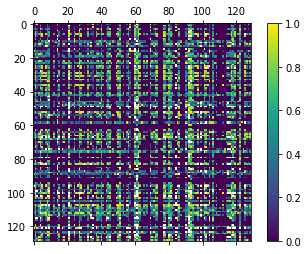

In [333]:
forest_avg_score
size = max(id_list)
p_matrix = np.zeros((size+1,size+1))
for i,x in enumerate(forest_avg_score):
    for j,y in enumerate(forest_avg_score[i+1:]):
        p_matrix[x['id_a']][x['id_b']] = x['score']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(p_matrix, interpolation='nearest')
fig.colorbar(cax)
plt.savefig('pmatrix.pdf')

In [329]:
forest_df[(forest_df['id_a']==11) & (forest_df['id_b']==680)].score.values =

array([], dtype=float64)

In [331]:
forest_avg_score = []
for i,id_a in enumerate(id_list):
    for j,id_b in enumerate(id_list[i+1:]):
        p_avgscores_dic = {}
        avg_score = forest_df[(forest_df['id_a']==id_a) & (forest_df['id_b']==id_b)].score.mean()
        p_avgscores_dic['id_a'] = id_a
        p_avgscores_dic['id_b'] = id_b
        p_avgscores_dic['score'] = avg_score
        forest_avg_score.append(p_avgscores_dic)
        

0


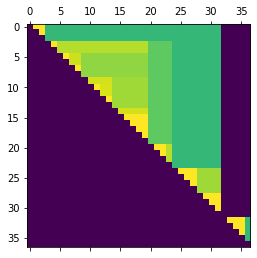

In [14]:
total_tree_lists=[]
for tree in total_results_100:
    tree_list = list(tree.items())
    total_tree_lists.append(tree_list)
for index,l in enumerate(total_tree_lists):
    p_matrix_list = {}
    p_matrix = np.zeros((len(l),len(l)))
    for i,x in enumerate(l):
        for j,y in enumerate(l[i+1:]):
            u,d = codes.decision_tree.compare_str(x[1],y[1])
            p = u/(len(x[1])+len(y[1])-d)
            p_matrix_list[(x[0],y[0])]=p
            p_matrix[i][j+i+1] = p
    print(index)
    plt.matshow(p_matrix)

In [34]:

%time total_results_10 = codes.decision_tree.random_f(df[:100],10)
imp.reload(codes.decision_tree)
total_tree_lists=[]
for tree in total_results_10:
    tree_list = list(tree.items())
    total_tree_lists.append(tree_list)


CPU times: user 1min 51s, sys: 861 ms, total: 1min 52s
Wall time: 1min 54s


10


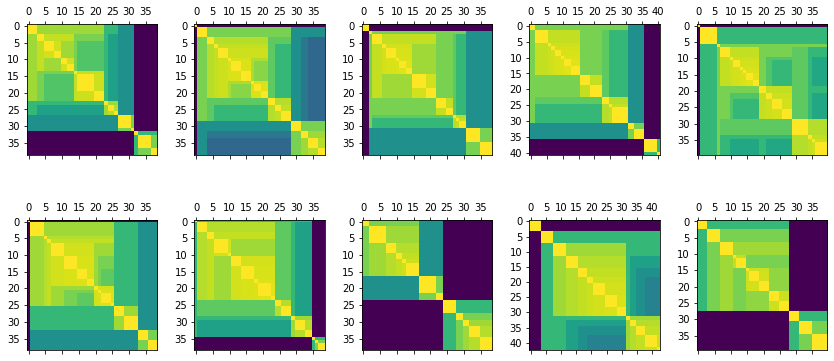

In [48]:

fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
print(len(total_tree_lists))
p_matrixs = []
for index,l in enumerate(total_tree_lists):
    p_matrix_list = {}
    p_matrix = np.zeros((len(l),len(l)))
    for i,x in enumerate(l):
        for j,y in enumerate(l):
            u,d = codes.decision_tree.compare_str(x[1],y[1])
            p = 2*u/(len(x[1])+len(y[1])-d)
            p_matrix_list[(x[0],y[0])]=p
            p_matrix[i][j] = p
    axs[index].matshow(p_matrix)
    cax = axs[index].matshow(p_matrix, interpolation='nearest')
    p_matrixs.append(p_matrix_list)
plt.savefig('pmatrix_all.pdf')